In [165]:
# import packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras as kb
from tensorflow.keras import layers
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [166]:
# importing CSV
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(len(df))
df.head()

506


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [167]:
# check for missing data
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [168]:
predictors = ["crim", "zn", "indus", "chas", "nox", 'rm', "age", "dis", "rad", "tax", "ptratio", "b", "lstat"]
X = df[predictors]
y = df["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [169]:
# z-scoring
z = StandardScaler()
X_train = z.fit_transform(X_train)
X_test = z.transform(X_test)

# model architecture
model = kb.Sequential([
    kb.layers.Dense(64, activation='relu', input_shape=[13]),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(128, activation='relu'),
    kb.layers.Dropout(0.2),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(256, activation='relu'),
    kb.layers.BatchNormalization(),
    kb.layers.Dropout(0.3),
    kb.layers.Dense(128, activation = 'relu'),
    kb.layers.Dense(1)
])

# compiling the model
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

# early stopping
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'mean_absolute_error', patience = 20)]

# fitting the model with early stopping
model_history = model.fit(X_train, y_train, epochs = 200, validation_split = 0.1, callbacks = [callbacks])

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_194 (Dense)           (None, 64)                896       
                                                                 
 batch_normalization_108 (Ba  (None, 64)               256       
 tchNormalization)                                               
                                                                 
 dense_195 (Dense)           (None, 128)               8320      
                                                                 
 dropout_68 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_109 (Ba  (None, 128)              512       
 tchNormalization)                                               
                                                                 
 dense_196 (Dense)           (None, 256)             

In [170]:
# evaluating the model on the train set
train_loss, train_mae = model.evaluate(X_train, y_train)
print('Train loss: ', train_loss, 'Train MAE :', train_mae)

# evaluating the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print('Test loss: ', test_loss, 'Test MAE: ', test_mae)

13/13 [==============================] - 0s 709us/step - loss: 2.8978 - mean_absolute_error: 1.2689
Train loss:  2.89776611328125 Train MAE : 1.2689417600631714
4/4 [==============================] - 0s 667us/step - loss: 5.5670 - mean_absolute_error: 1.8448
Test loss:  5.566975116729736 Test MAE:  1.8448398113250732


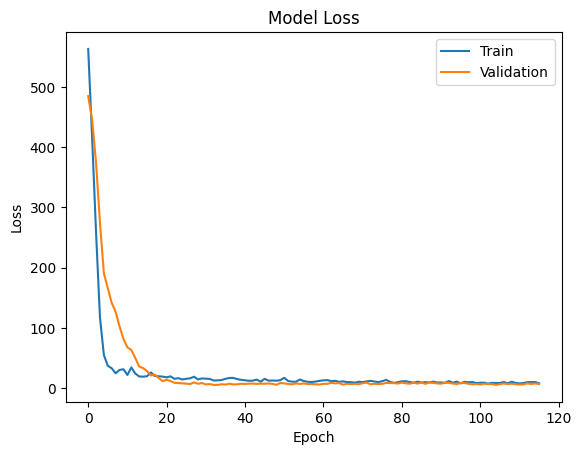

In [171]:
# training history
plt.plot(model_history.history['loss'], label = 'Train')
plt.plot(model_history.history['val_loss'], label = 'Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc = 'upper right')

4/4 [==============================] - 0s 834us/step


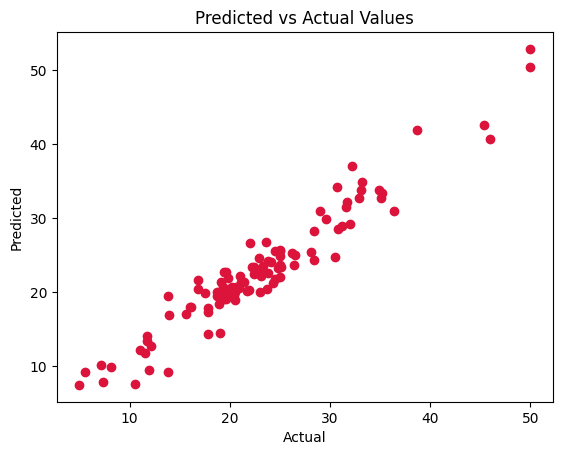

In [172]:
# using the model on test data
y_pred = model.predict(X_test)

# graph to show the predicted vs actual values
plt.scatter(y_test, y_pred, c = "crimson")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title("Predicted vs Actual Values")
plt.show()

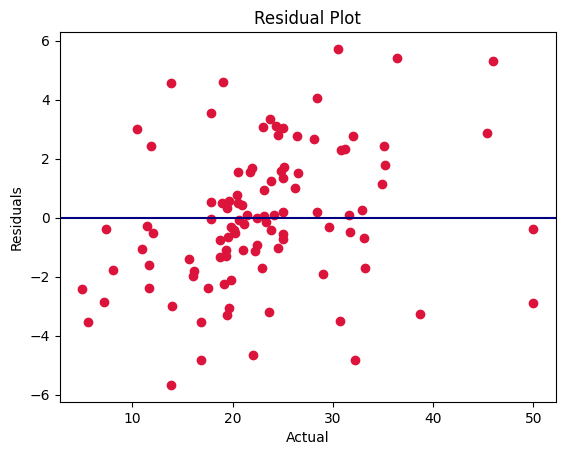

In [173]:
# calculating residuals with .flatten() becaused y_pred is not 1 dimensional
residuals = y_test - y_pred.flatten()

# residual plot
plt.scatter(y_test, residuals, c = "crimson")
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(c = 'navy')
plt.show()